
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Aprendizagem de Máquina
<br>
**Unidade Curricular:** Modelos, Algoritmos e Estimadores
<br>
**Tema da Semana:** K-Means
<br>


## Aula 2: Hiperparâmentros do K-means

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não estiverem instaladas, instalem-as.

- Acompanhem as instruções do código.

- Ao finalizar, respondam as perguntas descritas no roteiro de prática e discutam com seus colegas e professor.

### 1) Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 2) Carregando os dados

In [2]:
file_path = "Mall_Customers.csv"
df = pd.read_csv(file_path)

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3) Pré-processamento e padronização dos dados

In [4]:
# Pré-processamento
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Convertendo categórico para numérico
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']
X = df[features]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4) Implementação do método cotovelo para definição do melhor valor para K

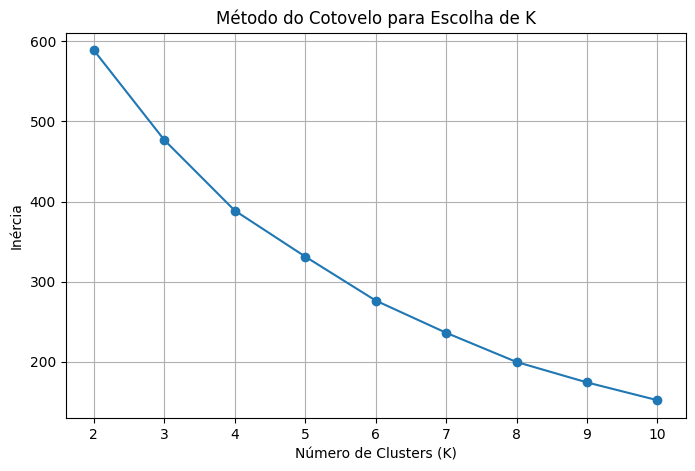

In [5]:
# Testando diferentes valores de K para encontrar o melhor número de clusters
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Criando um gráfico da inércia vs. número de clusters para encontrar o melhor K
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de K')
plt.grid(True)
plt.show()

### 5) Comparação entres os diferentes tipos de inicialização

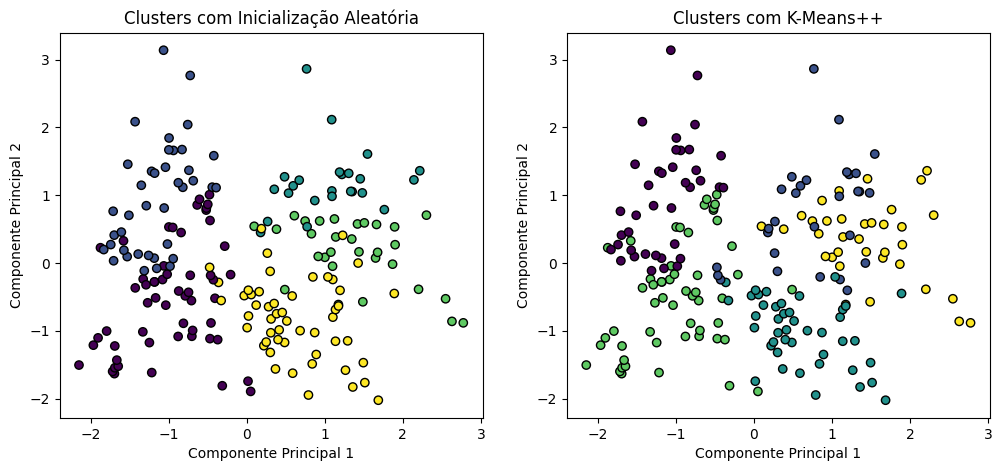

In [6]:
# Comparação entre Inicialização Aleatória init='random' e K-Means++ init='k-means++'
kmeans_random = KMeans(n_clusters=5, init='random', random_state=42, n_init=10)
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Treinando os modelos
y_kmeans_random = kmeans_random.fit_predict(X_scaled)
y_kmeans_plus = kmeans_plus.fit_predict(X_scaled)

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizando os clusters com as duas inicializações
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Inicialização Aleatória
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_random, cmap='viridis', edgecolors='k')
axes[0].set_title("Clusters com Inicialização Aleatória")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

# K-Means++
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_plus, cmap='viridis', edgecolors='k')
axes[1].set_title("Clusters com K-Means++")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

plt.show()

### 6) Comparação entre os critérios de parada

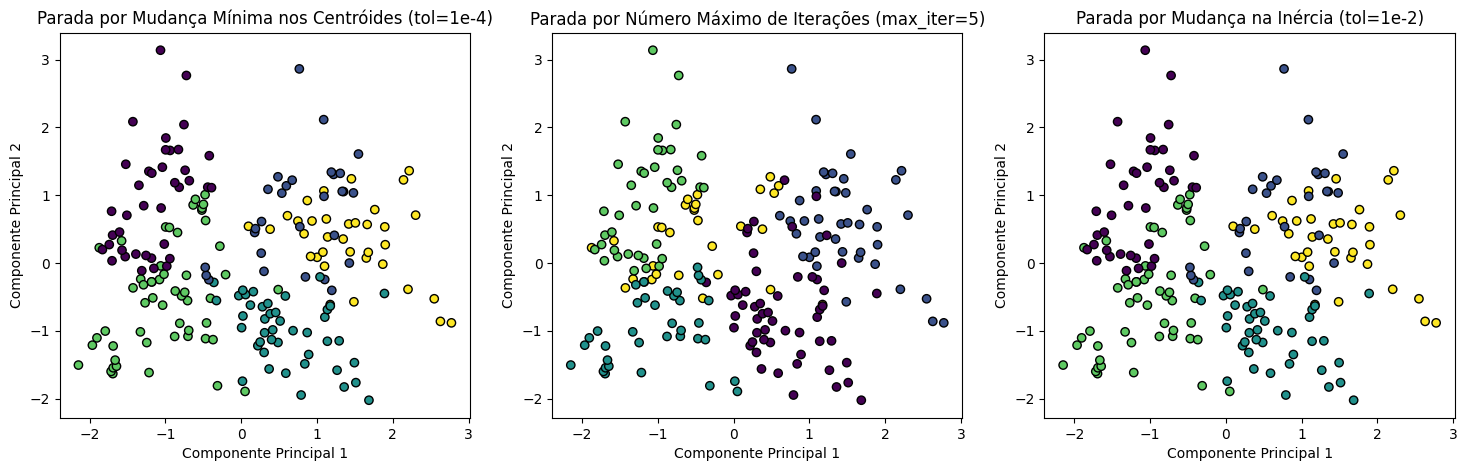

In [7]:
# 1. Mudança mínima nos centróides (padrão: tol=1e-4)
kmeans_tol = KMeans(n_clusters=5, init='k-means++', random_state=42, tol=1e-4, n_init=10)
y_kmeans_tol = kmeans_tol.fit_predict(X_scaled)

# 2. Número máximo de iterações reduzido (menos preciso)
kmeans_iter = KMeans(n_clusters=5, init='k-means++', random_state=42, max_iter=5, n_init=10)
y_kmeans_iter = kmeans_iter.fit_predict(X_scaled)

# 3. Mudança mínima na inércia (critério indireto pelo tol)
kmeans_inertia = KMeans(n_clusters=5, init='k-means++', random_state=42, tol=1e-2, n_init=10)
y_kmeans_inertia = kmeans_inertia.fit_predict(X_scaled)

# Redução de dimensionalidade para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizando os clusters com diferentes critérios de parada
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Critério 1: Mudança mínima nos centróides (tol=1e-4)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_tol, cmap='viridis', edgecolors='k')
axes[0].set_title("Parada por Mudança Mínima nos Centróides (tol=1e-4)")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

# Critério 2: Número máximo de iterações (max_iter=5)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_iter, cmap='viridis', edgecolors='k')
axes[1].set_title("Parada por Número Máximo de Iterações (max_iter=5)")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

# Critério 3: Mudança mínima na inércia (tol=1e-2)
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_inertia, cmap='viridis', edgecolors='k')
axes[2].set_title("Parada por Mudança na Inércia (tol=1e-2)")
axes[2].set_xlabel("Componente Principal 1")
axes[2].set_ylabel("Componente Principal 2")

plt.show()